In [1]:
# cd CrisisMMD_Dataset

In [2]:
%reload_ext autoreload # ensuring that any edits to libraries you make are reloaded here automatically
%autoreload 2
%matplotlib inline #to ensuere charts or images displayed are shown in this notebook

In [3]:
# importing necessary packages
from fastai import *
from fastai.text import *
from fastai.callbacks import *
from Precision_Module import Precision1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import aidrtokenize
from sklearn.metrics import classification_report

In [5]:
path = Path('/notebooks/CrisisMMD_Dataset')
# path.ls()

In [6]:
path_img = path/'data_image'

In [7]:
def clean_ascii(text):
    # function to remove non-ASCII chars from data
    return ''.join(i for i in text if ord(i) < 128)

In [8]:
data_human_text_file = 'new_task_humanitarian_text_img_agreed_lab_human_data.tsv'
test_data_human_text_file = 'new_task_humanitarian_text_img_agreed_lab_test_data.tsv' 

In [9]:
# reading the required data from various file and saving it with necessary changes in order to avoid repetation 

if data_human_text_file and test_data_human_text_file in path.ls():
    data_human_text_file = pd.read_csv('new_task_humanitarian_text_img_agreed_lab_human_data.tsv',delimiter='\t',encoding='utf-8')
    test_human_text_file = pd.read_csv('task_humanitarian_text_img_agreed_lab_test_data.tsv',delimiter='\t',encoding='utf-8')
else:
    train_human_text=pd.read_csv('task_humanitarian_text_img_agreed_lab_train.tsv',delimiter='\t',encoding='utf-8')
    test_human_text=pd.read_csv('task_humanitarian_text_img_agreed_lab_test.tsv',delimiter='\t',encoding='utf-8')
    dev_human_text=pd.read_csv('task_humanitarian_text_img_agreed_lab_dev.tsv',delimiter='\t',encoding='utf-8')
    
    train_human_text['tweet_text']=train_human_text['tweet_text'].apply(lambda x:aidrtokenize.tokenize(x))
    dev_human_text['tweet_text']=dev_human_text['tweet_text'].apply(lambda x:aidrtokenize.tokenize(x))
    test_human_text['tweet_text']=test_human_text['tweet_text'].apply(lambda x:aidrtokenize.tokenize(x))
    
    train_human_text['tweet_text'] = train_human_text['tweet_text'].apply(lambda x:clean_ascii(x))
    dev_human_text['tweet_text'] = dev_human_text['tweet_text'].apply(lambda x:clean_ascii(x))
    test_human_text['tweet_text'] = test_human_text['tweet_text'].apply(lambda x:clean_ascii(x))
    
    train_human_text['is_valid'] = False
    dev_human_text['is_valid'] = True
    test_human_text['is_valid'] = False 

    train_human_text['is_test'] = False
    dev_human_text['is_test'] = False
    test_human_text['is_test'] = True
    
    data_human_text = pd.concat([train_human_text,dev_human_text],axis=0).reset_index()
    data_human_text = data_human_text.drop(['index'],axis=1)
    
    test_data_human_text = pd.concat([train_human_text,test_human_text],axis=0).reset_index()
    test_data_human_text = test_data_human_text.drop(['index'],axis=1)
    
    data_human_text.to_csv('new_task_humanitarian_text_img_agreed_lab_human_data.tsv',encoding='utf-8')
    test_data_human_text.to_csv('new_task_humanitarian_text_img_agreed_lab_test_data.tsv',encoding='utf-8')

In [10]:
print(f"shape of data: {data_human_text.shape}\n")
print(data_human_text['is_valid'].value_counts())
print("="*50)
print(f"shape of test data: {test_data_human_text.shape}\n")
print(test_data_human_text['is_test'].value_counts())

shape of data: (7124, 11)

False    6126
True      998
Name: is_valid, dtype: int64
shape of test data: (7081, 11)

False    6126
True      955
Name: is_test, dtype: int64


In [11]:
data_human_text.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,is_valid,is_test
0,california_wildfires,917793137925459968,917793137925459968_0,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
1,california_wildfires,917793137925459968,917793137925459968_1,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
2,california_wildfires,917793137925459968,917793137925459968_2,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
3,california_wildfires,917815040962695168,917815040962695168_2,photos of california destructive wildfires via,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
4,california_wildfires,917828283047260161,917828283047260161_0,why california wildfires are worse in the fall,data_image/california_wildfires/10_10_2017/917...,other_relevant_information,other_relevant_information,other_relevant_information,Positive,False,False


In [12]:
test_data_human_text.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,is_valid,is_test
0,california_wildfires,917793137925459968,917793137925459968_0,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
1,california_wildfires,917793137925459968,917793137925459968_1,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
2,california_wildfires,917793137925459968,917793137925459968_2,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
3,california_wildfires,917815040962695168,917815040962695168_2,photos of california destructive wildfires via,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
4,california_wildfires,917828283047260161,917828283047260161_0,why california wildfires are worse in the fall,data_image/california_wildfires/10_10_2017/917...,other_relevant_information,other_relevant_information,other_relevant_information,Positive,False,False


In [13]:
# preparing data for language model in order to get encoder and word embedding vocab for text classification model

data_lm = (TextList
           .from_df(data_human_text,path, cols='tweet_text')
           #Where are the text? Column 'text' of texts.csv
           .split_from_df(col='is_valid')
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()
           #Label it for a language model
           .databunch())
           #Finally we convert to a DataBunch

In [14]:
data_lm

TextLMDataBunch;

Train: LabelList (6126 items)
x: LMTextList
xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos photos of california destructive wildfires via,xxbos why california wildfires are worse in the fall
y: LMLabelList
,,,,
Path: /notebooks/CrisisMMD_Dataset;

Valid: LabelList (998 items)
x: LMTextList
xxbos family xxunk finds dog they lost when escaping california wildfires,xxbos hurricane irma on twitter,xxbos feel xxunk by xxunk in so many levels how xxunk can picture xxunk me so bad on the floor while preparing for,xxbos postirma can xxunk so true,xxbos hurricane maria remains severe threat sept utc
y: LMLabelList
,,,,
Path: /notebooks/CrisisMMD_Dataset;

Test: None

In [15]:
# showing the data with corresponding annotations
data_lm.show_batch()

idx,text
0,with us for few days her xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos xxunk fire tubbsfire xxunk xxunk xxunk fire california napa
1,in kalutura district today situation lka srilanka xxbos veyangalla village heavily affected by recent floodsl in kalutura district today situation lka srilanka xxbos chinese cargo plane delivers relief to floodhit srilanka xxbos chinese cargo plane delivers relief to floodhit srilanka xxbos xxunk xxunk mora xxunk xxunk and warning xxunk xxunk xxbos xxunk xxunk mora xxunk xxunk and warning xxunk xxunk xxbos xxunk xxunk xxunk over relief to those affected by
2,xxbos sadrith mora xxunk xxunk morrowind eso ps xxbos tried this place out today in finnieston mora enjoyed it xxbos tried this place out today in finnieston mora enjoyed it xxbos tried this place out today in finnieston mora enjoyed it xxbos tried this place out today in finnieston mora enjoyed it xxbos xxunk xxunk xxunk xxunk xxunk xxunk xxunk mora xxbos xxunk xxunk xxunk xxunk xxunk xxunk xxunk mora
3,those lost in mexico tragic earthquake fuerzamexico xxbos the lagalaxy donned black armbands during atlvla to honor those lost in mexico tragic earthquake fuerzamexico xxbos xxunk xxunk factory pray for the earthquake in mexico f f f xxbos xxunk xxunk factory pray for the earthquake in mexico f f f xxbos volunteers propel mexico city earthquake response xxbos volunteers propel mexico city earthquake response xxbos volunteers propel mexico city earthquake
4,iraq xxbos turkish red crescent cooperates with iraqi red crescent in order to alleviate needs of earthquake victims in iraq xxbos president dr xxunk xxunk in xxunk district of iraq which suffered the most from the earthquake xxbos hundred earthquake victim families in khanaqin city of iraq were received food support today xxbos hundred earthquake victim families in khanaqin city of iraq were received food support today xxbos hundred earthquake


In [16]:
# importing pretrained AWD_LSTM model and making learner object consist of data,model for training
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [17]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


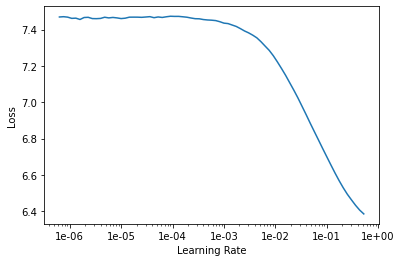

In [18]:
learn_lm.recorder.plot(skip_end=15)

In [19]:
learn_lm.fit_one_cycle(2,3e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.027356,4.727753,0.225893,00:01
1,5.099859,4.624011,0.234077,00:01


In [20]:
learn_lm.unfreeze()

In [21]:
learn_lm.fit_one_cycle(1, 3e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.233407,4.734713,0.240476,00:01


In [22]:
# saving encoder for using it in classification model
learn_lm.save_encoder('fine_tuned_enc_human')

In [23]:
# preprocessing and creating test data for classification
test_data_clas = (TextList.from_df(test_data_human_text,path,cols='tweet_text',vocab=data_lm.vocab)
                   .split_from_df(col='is_test')
                   .label_from_df(cols='label_text')
                   .databunch())

In [24]:
# preprocessing and creating data for classification
data_clas = (TextList.from_df(data_human_text,path,cols='tweet_text',vocab=data_lm.vocab)
                   .split_from_df(col='is_valid')
                   .label_from_df(cols='label_text')
                   .add_test(test_data_clas.valid_ds)
                   .databunch())

In [25]:
data_clas

TextClasDataBunch;

Train: LabelList (6126 items)
x: TextList
xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos photos of california destructive wildfires via,xxbos why california wildfires are worse in the fall
y: CategoryList
infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,other_relevant_information
Path: /notebooks/CrisisMMD_Dataset;

Valid: LabelList (998 items)
x: TextList
xxbos family xxunk finds dog they lost when escaping california wildfires,xxbos hurricane irma on twitter,xxbos feel xxunk by xxunk in so many levels how xxunk can picture xxunk me so bad on the floor while preparing for,xxbos postirma can xxunk so true,xxbos hurricane maria remains severe threat sept utc
y: CategoryList
not_humanitarian,other_relevant_information,not_humanitar

In [26]:
# showing data with labels
data_clas.show_batch()

text,target
xxbos to xxunk time lost to irma amp so we can raise as much money for xxunk xxunk as we like to we ll be raising,not_humanitarian
xxbos the best part was that it let me spend time with my family early and they got to meet my new kitten sam xxunk,not_humanitarian
xxbos update on my mom in dr and maria same path as irma eye bit to her north should be strong winds some rain but,not_humanitarian
xxbos last day to xxunk to help victims of hurricanes harvey and irma of all xxunk sales at both of our stores go to,rescue_volunteering_or_donation_effort
xxbos xxunk former london mayor is in my xxunk xxunk at mora rd xxunk station to vote for to be pm jeremy this morning,not_humanitarian


In [44]:
# importing pretrained AWD-LSTM model and making learner object consist of data,model,metrics and callbacks for training

learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5,metrics=[accuracy,Precision1(average='macro'),
                Precision1(average='weighted'),Recall(average='macro'),Recall(average='weighted'),
               FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)],
            callback_fns=[ShowGraph,partial(EarlyStoppingCallback, monitor='valid_loss', min_delta=0.01, patience=3),
               partial(SaveModelCallback,every='improvement', monitor='accuracy', name='best'),
               partial(ReduceLROnPlateauCallback,monitor='valid_loss', mode='auto', patience=0,
                       factor=0.2, min_delta=0, min_lr=0.000001)]
            )


In [45]:
# laoding encoder for classification
learn_clas.load_encoder('fine_tuned_enc_human')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6126 items)
x: TextList
xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos photos of california destructive wildfires via,xxbos why california wildfires are worse in the fall
y: CategoryList
infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,other_relevant_information
Path: /notebooks/CrisisMMD_Dataset;

Valid: LabelList (998 items)
x: TextList
xxbos family xxunk finds dog they lost when escaping california wildfires,xxbos hurricane irma on twitter,xxbos feel xxunk by xxunk in so many levels how xxunk can picture xxunk me so bad on the floor while preparing for,xxbos postirma can xxunk so true,xxbos hurricane maria remains severe threat sept utc
y: CategoryList
not_humanitarian,other_relevant_informati

In [46]:
# learn_clas.lr_find()

In [47]:
# learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,0.956873,0.830520,0.713427,0.531272,0.703423,0.482119,0.713427,0.499961,0.700185,00:02
1,0.760406,0.745188,0.723447,0.568721,0.717285,0.484960,0.723447,0.514299,0.707893,00:02
2,0.685703,0.708959,0.729459,0.561540,0.718881,0.504197,0.729459,0.526030,0.717916,00:02


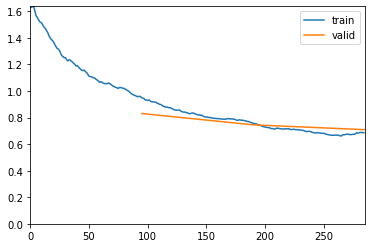

Better model found at epoch 0 with accuracy value: 0.7134268283843994.
Better model found at epoch 1 with accuracy value: 0.7234469056129456.
Better model found at epoch 2 with accuracy value: 0.7294589281082153.


In [48]:
# training the model's top layer's keeping keep other layer's in freezing mode, all the metrics shown here, have been
# evaluted on validation set
learn_clas.fit_one_cycle(3,5e-3,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,0.698528,0.671952,0.729459,0.555553,0.717063,0.507009,0.729459,0.525929,0.719162,00:02


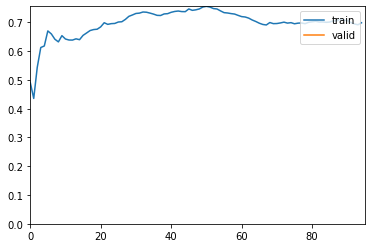

Better model found at epoch 0 with accuracy value: 0.7294589281082153.


In [49]:
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,0.591404,0.642755,0.750501,0.706744,0.747468,0.591545,0.750501,0.624835,0.746050,00:03


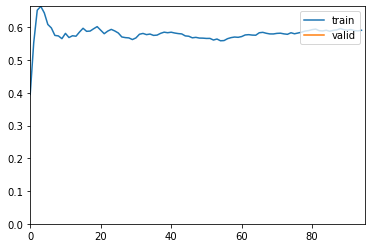

Better model found at epoch 0 with accuracy value: 0.7505009770393372.


In [50]:
learn_clas.freeze_to(-3)
learn_clas.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,0.490413,0.634675,0.752505,0.677849,0.747789,0.574772,0.752505,0.600215,0.747646,00:03
1,0.495353,0.625780,0.757515,0.658088,0.754764,0.603117,0.757515,0.623290,0.753139,00:03
2,0.462070,0.620988,0.762525,0.663590,0.758370,0.601964,0.762525,0.625903,0.757823,00:03
3,0.429315,0.627357,0.767535,0.668860,0.763315,0.614868,0.767535,0.636060,0.764419,00:03
4,0.379017,0.630903,0.764529,0.630574,0.762682,0.612002,0.764529,0.620663,0.763106,00:03
5,0.358128,0.633150,0.768537,0.636890,0.766303,0.614094,0.768537,0.624559,0.766316,00:03


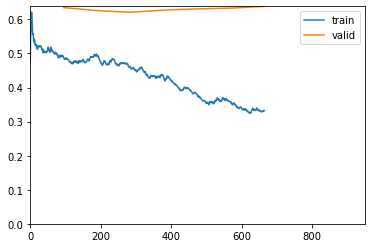

Better model found at epoch 0 with accuracy value: 0.7525050044059753.
Better model found at epoch 1 with accuracy value: 0.757515013217926.
Better model found at epoch 2 with accuracy value: 0.7625250220298767.
Better model found at epoch 3 with accuracy value: 0.7675350904464722.
Epoch 3: reducing lr to 0.00019009692640269474
Epoch 4: reducing lr to 0.00016234913078995263
Better model found at epoch 5 with accuracy value: 0.7685370445251465.
Epoch 5: reducing lr to 0.00012225240438725783
Epoch 6: early stopping
Better model found at epoch 6 with accuracy value: 0.7715430855751038.
Epoch 6: reducing lr to 7.774839561274215e-05


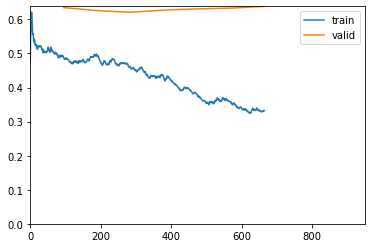

In [51]:

learn_clas.unfreeze()
learn_clas.fit_one_cycle(10, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [52]:
interp = ClassificationInterpretation.from_learner(learn_clas)

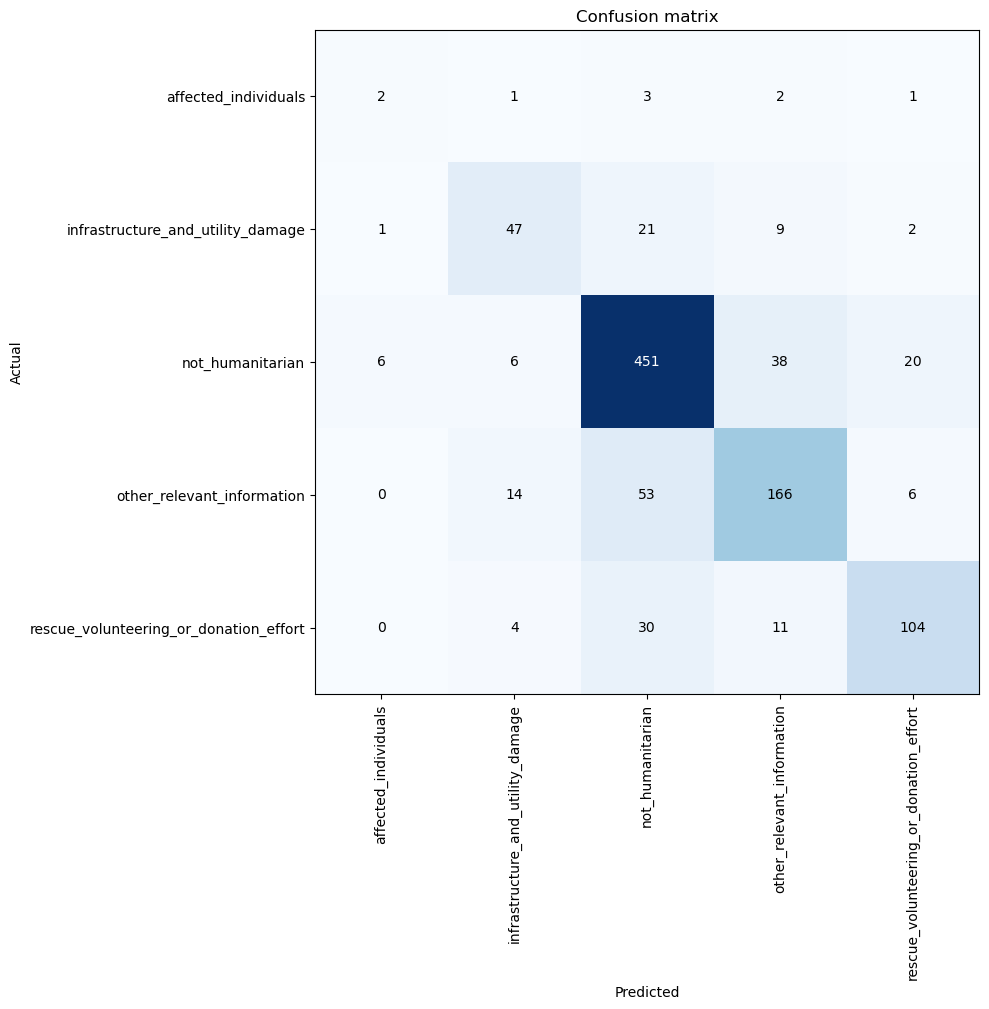

In [53]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=100)

In [54]:
preds,y,losses = learn_clas.get_preds(ds_type = DatasetType.Valid,with_loss=True)

In [55]:
y_preds = preds.argmax(1)

In [56]:
target_names = ['affected_individuals',
 'infrastructure_and_utility_damage',
 'not_humanitarian',
 'other_relevant_information',
 'rescue_volunteering_or_donation_effort']

In [57]:
print(classification_report(y, y_preds, target_names=target_names))

                                        precision    recall  f1-score   support

                  affected_individuals       0.22      0.22      0.22         9
     infrastructure_and_utility_damage       0.65      0.59      0.62        80
                      not_humanitarian       0.81      0.87      0.84       521
            other_relevant_information       0.73      0.69      0.71       239
rescue_volunteering_or_donation_effort       0.78      0.70      0.74       149

                              accuracy                           0.77       998
                             macro avg       0.64      0.61      0.63       998
                          weighted avg       0.77      0.77      0.77       998



In [58]:
learn_clas.validate(test_data_clas.valid_dl,metrics=[accuracy,Precision1(average='macro'),Precision1(average='weighted'),
                                                           Recall(average='macro'),Recall(average='weighted'),
                                                           FBeta(average='macro',beta=1),FBeta(average='weighted',beta=1)])

[0.6614636,
 tensor(0.7613),
 tensor(0.6382),
 tensor(0.7588),
 tensor(0.6150),
 tensor(0.7613),
 tensor(0.6253),
 tensor(0.7592)]

In [59]:
preds,y,losses = learn_clas.get_preds(ds_type = DatasetType.Test,with_loss=True)
y_preds = preds.argmax(1)
y = [test_data_clas.valid_ds[i][1].data for i in range(len(test_data_clas.valid_ds))]
print(classification_report(y, y_preds, target_names=target_names))

                                        precision    recall  f1-score   support

                  affected_individuals       0.25      0.22      0.24         9
     infrastructure_and_utility_damage       0.70      0.63      0.66        81
                      not_humanitarian       0.79      0.88      0.83       504
            other_relevant_information       0.80      0.64      0.71       235
rescue_volunteering_or_donation_effort       0.72      0.71      0.71       126

                              accuracy                           0.77       955
                             macro avg       0.65      0.62      0.63       955
                          weighted avg       0.77      0.77      0.77       955

